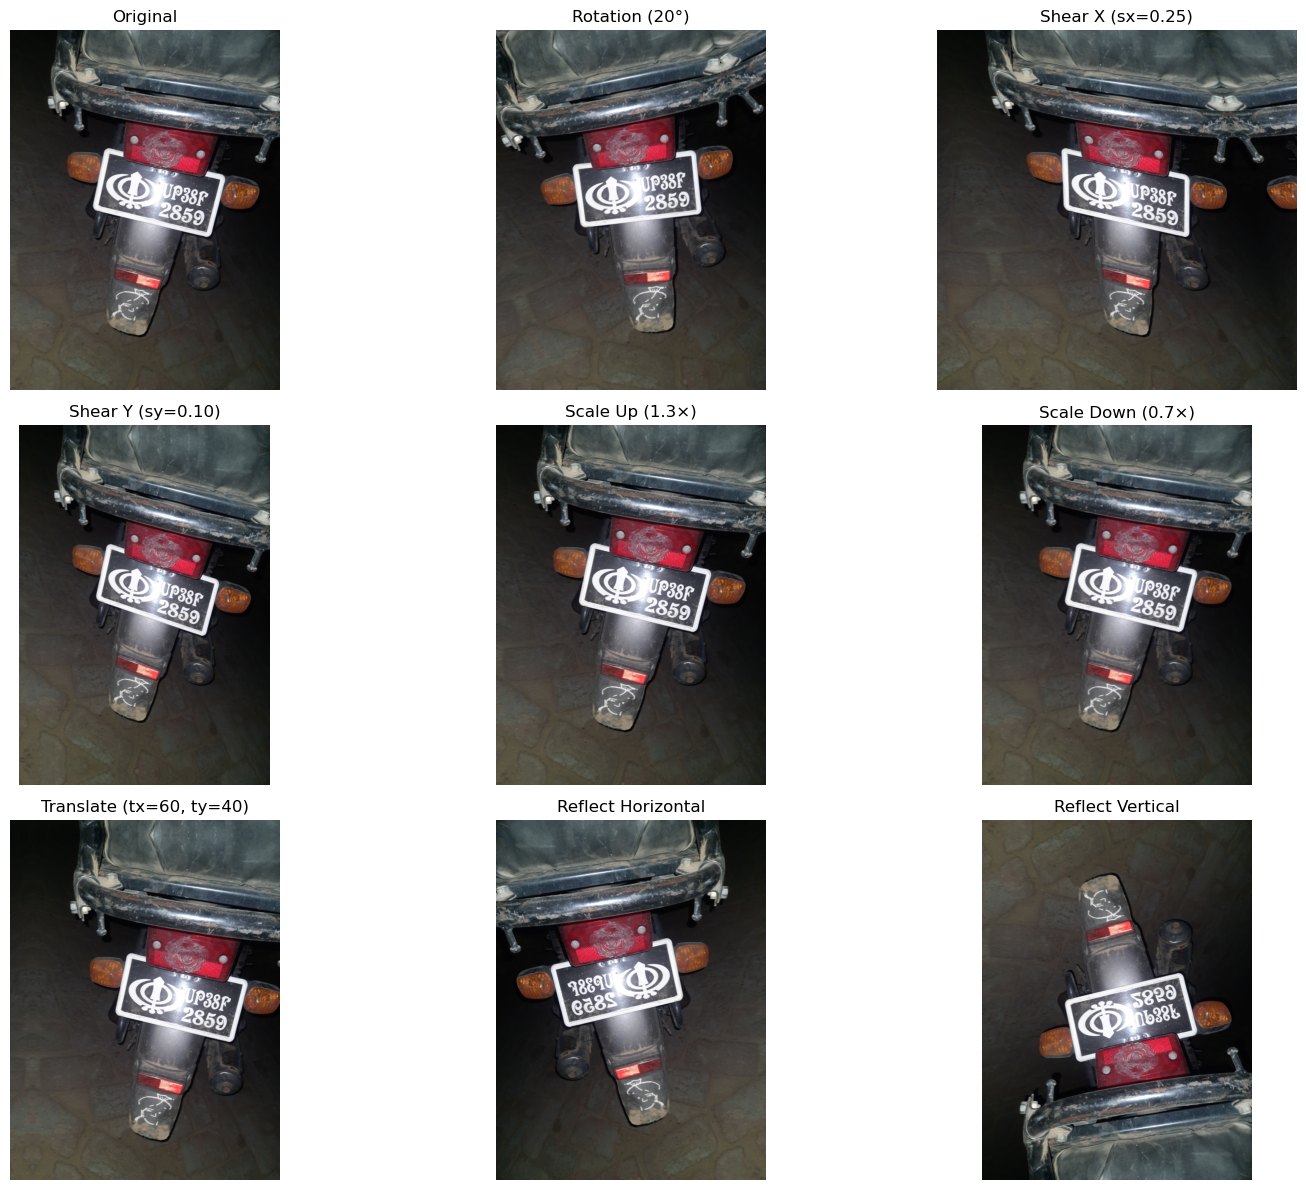

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = r"E:\Indian_Number_Plates\Sample_Images\Datacluster_number_plates (55).jpg"

def show_grid(titles, imgs, max_cols=3, figsize=(14,10)):
    n = len(imgs); cols = min(max_cols, n); rows = (n+cols-1)//cols
    plt.figure(figsize=figsize)
    for i,(t,img) in enumerate(zip(titles, imgs), 1):
        plt.subplot(rows, cols, i)
        if img.ndim == 3:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap='gray')
        plt.title(t); plt.axis('off')
    plt.tight_layout(); plt.show()

# Load and resize for display
bgr = cv2.imread(IMG_PATH)
if bgr is None: raise FileNotFoundError(IMG_PATH)
h, w = bgr.shape[:2]
scale = min(1.0, 720.0/min(h,w))
bgr = cv2.resize(bgr, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)
h, w = bgr.shape[:2]

# 1) Rotation (about image center)
angle, s = 20, 1.0
M_rot = cv2.getRotationMatrix2D((w/2, h/2), angle, s)
rotated = cv2.warpAffine(bgr, M_rot, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT101)

# 2) Shearing (affine) — x-shear and y-shear examples
sx, sy = 0.25, 0.10  # shear factors
# x-shear
M_shear_x = np.float32([[1, sx, 0],
                        [0, 1,  0]])
shear_x = cv2.warpAffine(bgr, M_shear_x, (int(w + abs(sx)*h), h),
                         flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT101)
# y-shear (keeping width same for visualization)
M_shear_y = np.float32([[1, 0,  0],
                        [sy,1,  0]])
shear_y = cv2.warpAffine(bgr, M_shear_y, (w, int(h + abs(sy)*w)),
                         flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT101)

# 3) Scaling (resize)
scaled_up   = cv2.resize(bgr, None, fx=1.3, fy=1.3, interpolation=cv2.INTER_CUBIC)
scaled_down = cv2.resize(bgr, None, fx=0.7, fy=0.7, interpolation=cv2.INTER_AREA)

# 4) Translation (shift)
tx, ty = 60, 40
M_trans = np.float32([[1, 0, tx],
                      [0, 1, ty]])
translated = cv2.warpAffine(bgr, M_trans, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT101)

# 5) Reflection (mirror) — horizontal and vertical flips
reflect_h = cv2.flip(bgr, 1)  # left-right
reflect_v = cv2.flip(bgr, 0)  # top-bottom

show_grid(
    ["Original", f"Rotation ({angle}°)", "Shear X (sx=0.25)",
     "Shear Y (sy=0.10)", "Scale Up (1.3×)", "Scale Down (0.7×)",
     f"Translate (tx={tx}, ty={ty})", "Reflect Horizontal", "Reflect Vertical"],
    [bgr, rotated, shear_x, shear_y, scaled_up, scaled_down, translated, reflect_h, reflect_v],
    max_cols=3, figsize=(16,12)
)
